# Sales Data Analysis with Python

### (A part of Big Data Analysis)

-------------

#### Restaurant Sales Dataset
***
Here, 

We have the sales data of a restaurant company from different cities (countries).

This data is available in CSV file format. We are going to analyze and visualize this data.

-------------

### Importing the Required Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [8]:
data = pd.read_csv(r"C:\Users\ashmi\Downloads\9. Sales-Data-Analysis.csv")

In [9]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,7/11/2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,7/11/2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,7/11/2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,8/11/2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,8/11/2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


In [10]:
data.info()                                      # to show some basic informations about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


#### Consider the Manager column

In [11]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,7/11/2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,7/11/2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,7/11/2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,8/11/2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,8/11/2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [12]:
data.Manager

0        Tom      Jackson
1             Pablo Perez
2           Joao    Silva
3           Walter Muller
4           Walter Muller
              ...        
249         Walter Muller
250         Walter Muller
251         Walter Muller
252         Walter Muller
253         Walter Muller
Name: Manager, Length: 254, dtype: object

In [13]:
data.Manager.unique()                     # to show all the unique values of the column

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [14]:
data.Manager.nunique()                      # to show count of unique values present in the column

14

In [15]:
data['Manager'] = data['Manager'].str.strip().str.replace(r'\s+', ' ', regex=True)   # to remove extra spaces in names

In [16]:
data.head(20)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,7/11/2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,7/11/2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,7/11/2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,8/11/2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,8/11/2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
5,10457,8/11/2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris
6,10459,8/11/2022,Sides & Other,4.99,200.40,In-store,Credit Card,Walter Muller,Berlin
7,10460,9/11/2022,Burgers,12.99,554.27,In-store,Credit Card,Remy Monet,Paris
8,10461,9/11/2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Remy Monet,Paris
9,10462,9/11/2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris


In [17]:
data['Manager'].unique()             # to show all the unique values of the column

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [18]:
data['Manager'].nunique()             # to show count of unique values present in the column

5

In [19]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,7/11/2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,7/11/2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,7/11/2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,8/11/2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,8/11/2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


# Converting the datatype of columns

In [20]:
data.info()                               # to get some basic info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [21]:
data.Quantity = data.Quantity.astype(float)  # to change the datatype of a column

In [22]:
data.info()                                  # to get some basic info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [23]:
data.Quantity = data.Quantity.round()              # to round-off the values of a column

In [24]:
data.Quantity

0      573.0
1      746.0
2      200.0
3      570.0
4      201.0
       ...  
249    200.0
250    754.0
251    281.0
252    630.0
253    678.0
Name: Quantity, Length: 254, dtype: float64

In [25]:
data.Quantity = data.Quantity.astype(int)             # to change the datatype of a column

In [26]:
data['Quantity']

0      573
1      746
2      200
3      570
4      201
      ... 
249    200
250    754
251    281
252    630
253    678
Name: Quantity, Length: 254, dtype: int32

In [27]:
data['Order ID'] = data['Order ID'].astype(int)        # to change the datatype of a column
data['Price'] = data['Price'].astype(float)            # to change the datatype of a column

In [28]:
data.info()                                       # to get some basic info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int32  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    int32  
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(1), int32(2), object(6)
memory usage: 16.0+ KB


In [29]:
data.Date = pd.to_datetime(data.Date, format = 'mixed')          # to convert the datatype into datetime format

In [30]:
data.Date.dtype                                # to check the datatype of any column

dtype('<M8[ns]')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int32         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int32         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(5)
memory usage: 16.0+ KB


In [32]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin


----------

# Analyzing the Data

# Q.1) Most Preferred Payment Method ?

In [33]:
data.head()                       # to show top 5 records of the dataframe

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin


In [34]:
data['Payment Method'].unique()                       # to show the unique values of a column

array([' Gift Card', ' Credit Card', ' Cash'], dtype=object)

In [35]:
data['Payment Method'].nunique()                      # to show the count of unique values in a column

3

In [36]:
data['Payment Method'].value_counts()                 # to show the unique values of a column with their counts

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

In [37]:
data['Payment Method'].value_counts(normalize=True)*100    # to get the result in percentage

Payment Method
Credit Card    47.244094
Cash           29.921260
Gift Card      22.834646
Name: proportion, dtype: float64

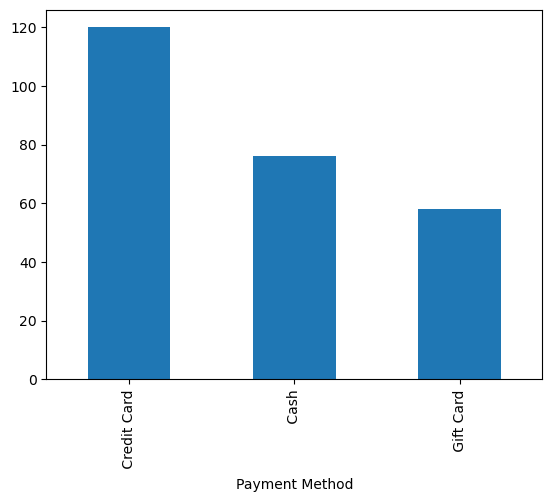

In [38]:
data['Payment Method'].value_counts().plot(kind='bar') ;   # to draw the bar graph

# Q.2) Most Selling Product ?
- By Quantity
- By Revenue


#### By Quantity

In [39]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin


In [40]:
data.groupby('Product')['Quantity'].sum()            # to make the group of unique values of a column

Product
Beverages             34988
Burgers               29018
Chicken Sandwiches    11133
Fries                 32023
Sides & Other          9800
Name: Quantity, dtype: int32

In [41]:
data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)   # to sort the result

Product
Beverages             34988
Fries                 32023
Burgers               29018
Chicken Sandwiches    11133
Sides & Other          9800
Name: Quantity, dtype: int32

In [42]:
most_quantity = data.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
most_quantity

Product
Beverages             34988
Fries                 32023
Burgers               29018
Chicken Sandwiches    11133
Sides & Other          9800
Name: Quantity, dtype: int32

In [43]:
type(most_quantity)                   # to the type of the variable

pandas.core.series.Series

In [44]:
most_quantity = most_quantity.reset_index()     # To convert the index of a Series into a column to form a DataFrame
most_quantity

,Product,Quantity
0,Beverages,34988
1,Fries,32023
2,Burgers,29018
3,Chicken Sandwiches,11133
4,Sides & Other,9800


In [45]:
type(most_quantity)                   # to the type of the variable

pandas.core.frame.DataFrame

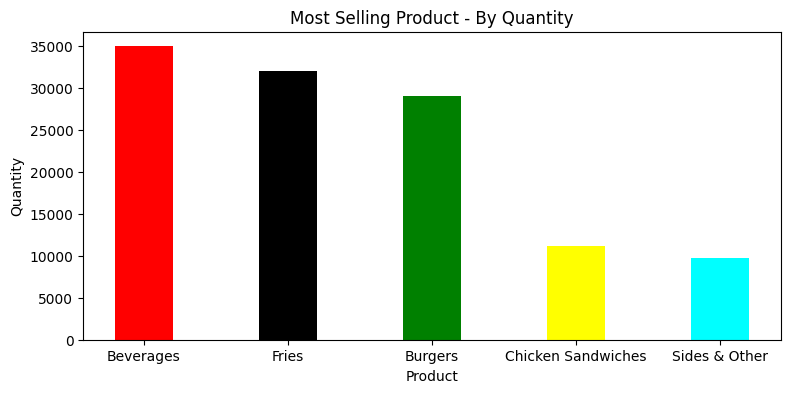

In [124]:
plt.figure(figsize = (9,4))
plt.bar(most_quantity['Product'], most_quantity['Quantity'], color = ['red', 'black', 'green', 'yellow', 'cyan'], width=0.4)
plt.title("Most Selling Product - By Quantity")              
plt.xlabel("Product")
plt.ylabel("Quantity");

#### By Revenue

In [43]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin


In [125]:
data['Revenue'] = data['Price'] * data['Quantity']       # to create a new column 'Revenue'

In [126]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-07-11,Fries,3.49,573.0,Online,Gift Card,Tom Jackson,London,1999.77,7
1,10453,2022-07-11,Beverages,2.95,746.0,Online,Gift Card,Pablo Perez,Madrid,2200.70,7
2,10454,2022-07-11,Sides & Other,4.99,200.0,In-store,Gift Card,Joao Silva,Lisbon,998.00,7
3,10455,2022-08-11,Burgers,12.99,570.0,In-store,Credit Card,Walter Muller,Berlin,7404.30,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201.0,In-store,Credit Card,Walter Muller,Berlin,1999.95,8
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200.0,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754.0,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281.0,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630.0,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [127]:
data.groupby('Product')['Revenue'].sum().sort_values(ascending = False) # to make the group of unique values of a column

Product
Burgers               376943.82
Fries                 125626.57
Chicken Sandwiches    114612.45
Beverages             103214.60
Sides & Other          48902.00
Name: Revenue, dtype: float64

In [128]:
most_revenue = data.groupby('Product')['Revenue'].sum().sort_values(ascending = False)
most_revenue

Product
Burgers               376943.82
Fries                 125626.57
Chicken Sandwiches    114612.45
Beverages             103214.60
Sides & Other          48902.00
Name: Revenue, dtype: float64

In [129]:
most_revenue = most_revenue.reset_index()         # To convert the index of a Series into a column to form a DataFrame
most_revenue

,Product,Revenue
0,Burgers,376943.82
1,Fries,125626.57
2,Chicken Sandwiches,114612.45
3,Beverages,103214.60
4,Sides & Other,48902.00


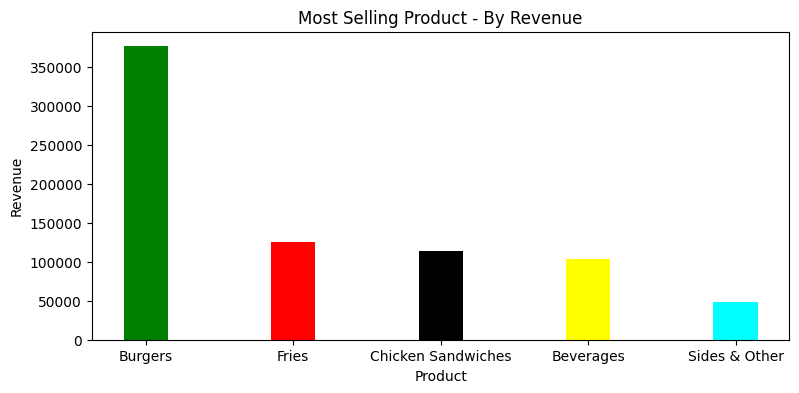

In [49]:
plt.figure(figsize=(9, 4))
plt.bar(most_revenue['Product'], most_revenue['Revenue'], color = ['green', 'red', 'black', 'yellow', 'cyan'], width = 0.3);
plt.title("Most Selling Product - By Revenue")       # setting the title       
plt.xlabel("Product")                                # setting the x-axis label
plt.ylabel("Revenue");                               # setting the y-axis label

# Q.3) Which city had maximum revenue
##### or
##### Which Manager earned maximum revenue

In [130]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-07-11,Fries,3.49,573.0,Online,Gift Card,Tom Jackson,London,1999.77,7
1,10453,2022-07-11,Beverages,2.95,746.0,Online,Gift Card,Pablo Perez,Madrid,2200.70,7
2,10454,2022-07-11,Sides & Other,4.99,200.0,In-store,Gift Card,Joao Silva,Lisbon,998.00,7
3,10455,2022-08-11,Burgers,12.99,570.0,In-store,Credit Card,Walter Muller,Berlin,7404.30,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201.0,In-store,Credit Card,Walter Muller,Berlin,1999.95,8
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200.0,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754.0,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281.0,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630.0,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [51]:
data.City.unique()                       # to check the unique values of the column 'City'

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

In [52]:
data.City.nunique()                      # to check the count of unique values of the column 'City'

5

In [53]:
data.groupby('City')['Revenue'].sum().sort_values(ascending=False)   # using groupby on 'City' & 'Revenue' column

City
Lisbon    241635.49
London    211160.04
Madrid    136154.24
Berlin    100572.34
Paris      79777.33
Name: Revenue, dtype: float64

In [54]:
data.Manager.nunique()                   # to check the count of unique values of the column 'Manager'

5

In [55]:
data.Manager.unique()                   # to check the unique values of the column 'Manager'

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [56]:
data.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)   # using groupby on 'Manager' & 'Revenue' column

Manager
Joao Silva       241635.49
Tom Jackson      211160.04
Pablo Perez      136154.24
Walter Muller    100572.34
Remy Monet        79777.33
Name: Revenue, dtype: float64

# Q.4) Date wise revenue

In [57]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95


In [58]:
data.Date.dtype

dtype('<M8[ns]')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
 9   Revenue         254 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 20.0+ KB


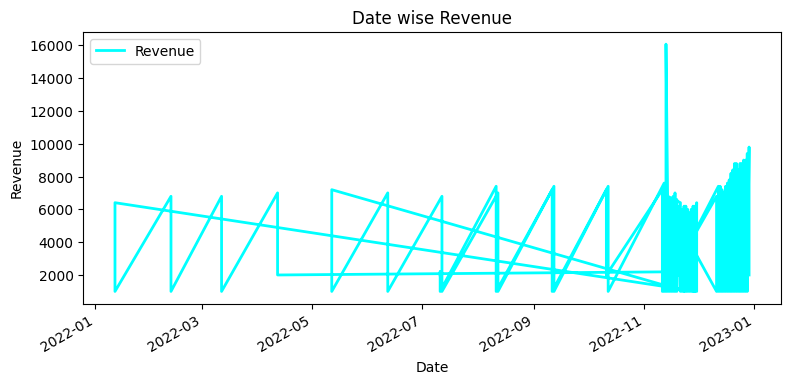

In [132]:
data.plot('Date', 'Revenue', color='cyan', linewidth=2, figsize=(9,4)) 
plt.title("Date wise Revenue")                        # setting the title
plt.xlabel("Date")                                    # setting the x-axis label
plt.ylabel("Revenue")                                 # setting the y-axis label
plt.show()

# Q.5) Average Revenue

In [61]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95


In [62]:
data['Revenue'].mean()

np.float64(3028.737952755905)

#### Q.6) Average Revenue of November & December month

In [48]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Month
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,7
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,7
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,7
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,8


In [47]:
data['Month'] = data['Date'].dt.month              # creating a new column showing Month only

In [136]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-07-11,Fries,3.49,573.0,Online,Gift Card,Tom Jackson,London,1999.77,7
1,10453,2022-07-11,Beverages,2.95,746.0,Online,Gift Card,Pablo Perez,Madrid,2200.70,7
2,10454,2022-07-11,Sides & Other,4.99,200.0,In-store,Gift Card,Joao Silva,Lisbon,998.00,7
3,10455,2022-08-11,Burgers,12.99,570.0,In-store,Credit Card,Walter Muller,Berlin,7404.30,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201.0,In-store,Credit Card,Walter Muller,Berlin,1999.95,8
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200.0,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754.0,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281.0,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630.0,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [138]:
m11 = data[data['Month'] == 11]          # filtering the records with month '11'
m11

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
16,10470,2022-11-11,Burgers,12.99,554.0,In-store,Credit Card,Pablo Perez,Madrid,7196.46,11
17,10471,2022-11-11,Chicken Sandwiches,9.95,201.0,In-store,Credit Card,Pablo Perez,Madrid,1999.95,11
18,10472,2022-11-11,Fries,3.49,630.0,In-store,Credit Card,Pablo Perez,Madrid,2198.70,11
19,10473,2022-11-11,Beverages,2.95,678.0,In-store,Credit Card,Pablo Perez,Madrid,2000.10,11
20,10474,2022-11-11,Sides & Other,4.99,200.0,In-store,Credit Card,Pablo Perez,Madrid,998.00,11
...,...,...,...,...,...,...,...,...,...,...,...
160,10620,2022-11-12,Burgers,12.99,585.0,Online,Gift Card,Tom Jackson,London,7599.15,11
161,10621,2022-11-12,Chicken Sandwiches,9.95,201.0,Online,Gift Card,Tom Jackson,London,1999.95,11
162,10622,2022-11-12,Fries,3.49,630.0,Online,Gift Card,Tom Jackson,London,2198.70,11
163,10623,2022-11-12,Beverages,2.95,746.0,Online,Gift Card,Tom Jackson,London,2200.70,11


In [139]:
m11.Revenue.mean()                           # to show the mean revenue

np.float64(2969.3819587628864)

In [140]:
m12 = data[data.Month == 12]                  # filtering the records with month '12'
m12

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
21,10475,2022-12-11,Burgers,12.99,523.0,In-store,Credit Card,Pablo Perez,Madrid,6793.77,12
22,10476,2022-12-11,Chicken Sandwiches,9.95,201.0,In-store,Credit Card,Pablo Perez,Madrid,1999.95,12
23,10477,2022-12-11,Fries,3.49,630.0,In-store,Credit Card,Pablo Perez,Madrid,2198.70,12
24,10478,2022-12-11,Beverages,2.95,678.0,In-store,Credit Card,Pablo Perez,Madrid,2000.10,12
25,10479,2022-12-11,Sides & Other,4.99,200.0,In-store,Credit Card,Pablo Perez,Madrid,998.00,12
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200.0,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754.0,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281.0,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630.0,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [69]:
m12.Revenue.mean()                                  # to show the mean revenue

np.float64(3194.7782978723403)

# Q.7) Standard Deviation of Revenue and Quantity ?

In [141]:
data['Quantity'].std()

214.97943096363838

In [142]:
data['Revenue'].std()

2419.9325462715055

# Q.8) Variance of Revenue and Quantity ?

In [143]:
data['Quantity'].var()

46216.155737449764

In [144]:
data['Revenue'].var()

5856073.528504092

# Q.9) Is revenue increasing or decreasing over time?

In [74]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,7
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,7
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,7
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,8


In [75]:
m11 = data[data['Month'] == 11]          # filtering the records with month '11'
m11

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
16,10470,2022-11-11,Burgers,12.99,554,In-store,Credit Card,Pablo Perez,Madrid,7196.46,11
17,10471,2022-11-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Pablo Perez,Madrid,1999.95,11
18,10472,2022-11-11,Fries,3.49,630,In-store,Credit Card,Pablo Perez,Madrid,2198.70,11
19,10473,2022-11-11,Beverages,2.95,678,In-store,Credit Card,Pablo Perez,Madrid,2000.10,11
20,10474,2022-11-11,Sides & Other,4.99,200,In-store,Credit Card,Pablo Perez,Madrid,998.00,11
...,...,...,...,...,...,...,...,...,...,...,...
160,10620,2022-11-12,Burgers,12.99,585,Online,Gift Card,Tom Jackson,London,7599.15,11
161,10621,2022-11-12,Chicken Sandwiches,9.95,201,Online,Gift Card,Tom Jackson,London,1999.95,11
162,10622,2022-11-12,Fries,3.49,630,Online,Gift Card,Tom Jackson,London,2198.70,11
163,10623,2022-11-12,Beverages,2.95,746,Online,Gift Card,Tom Jackson,London,2200.70,11


In [76]:
m11['Revenue'].sum()

np.float64(288030.05)

In [77]:
m12 = data[data.Month == 12]                  # filtering the records with month '12'
m12

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
21,10475,2022-12-11,Burgers,12.99,523,In-store,Credit Card,Pablo Perez,Madrid,6793.77,12
22,10476,2022-12-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Pablo Perez,Madrid,1999.95,12
23,10477,2022-12-11,Fries,3.49,630,In-store,Credit Card,Pablo Perez,Madrid,2198.70,12
24,10478,2022-12-11,Beverages,2.95,678,In-store,Credit Card,Pablo Perez,Madrid,2000.10,12
25,10479,2022-12-11,Sides & Other,4.99,200,In-store,Credit Card,Pablo Perez,Madrid,998.00,12
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,12
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,12
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,12


In [78]:
m12.Revenue.sum()

np.float64(300309.16)

# Q.10) Average 'Quantity Sold' & 'Average Revenue' for each product ?

In [79]:
data.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,7
1,10453,2022-07-11,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,7
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,7
3,10455,2022-08-11,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,8


In [80]:
data.groupby('Product')[['Quantity', 'Revenue']].agg({'Quantity':'mean', 'Revenue':'mean'})  # using agg() with groupby()

,Quantity,Revenue
Product,,
Beverages,699.760000,2064.292000
Burgers,558.038462,7248.919615
Chicken Sandwiches,214.096154,2204.085577
Fries,627.901961,2463.266078
Sides & Other,200.000000,998.000000
